# Data Preprocessing

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=260d5986c3fabd410447317f633d5c292558f3b0e9e4f469387f7a5b49036618
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.2 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade emoji

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize

In [ ]:
# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

In [ ]:
# read the csv files into a dataframe
insta_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/instagram.csv")
twitter_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/twitter.csv")

In [ ]:
twitter_df.sample(50)

## Cleaning Twitter Data

In [ ]:
#Lets check for duplicates
twitter_df.duplicated().sum()

158

**We have 158 duplicate tweets hence we will remove them.**

In [ ]:
# Lets filter them out in a new dataframe
tweet_df = twitter_df[~twitter_df.duplicated()]

In [ ]:
tweet_df.info()#we now have 47589 tweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47589 entries, 0 to 47746
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47589 non-null  object
 1   label   47589 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


**Let's check if the classes are balanced**

In [ ]:
tweet_df.label.value_counts()

cyberbullying        39589
non-cyberbullying     8000
Name: label, dtype: int64

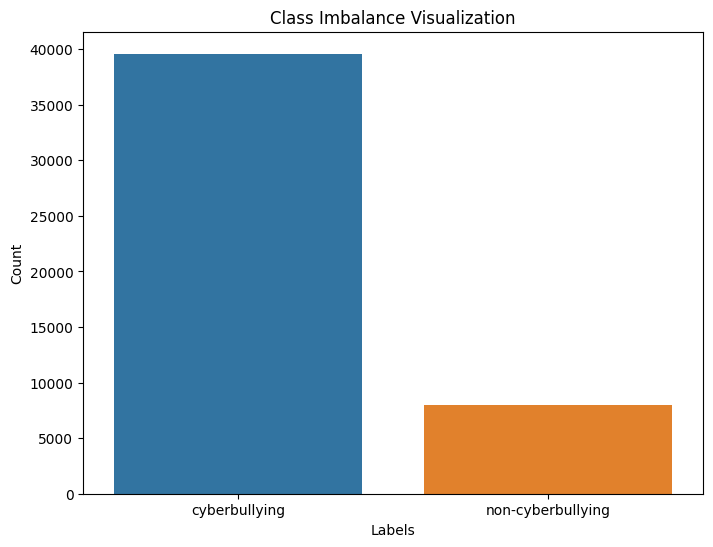

In [ ]:
class_counts = tweet_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Class Imbalance Visualization')
plt.show()


**We have an unbalanced dataset. During modelling we will have to deal with this.**

### Lets define function to clean the tweets using NLP techniques

#### Remove emojis

In [ ]:
# Clean emojis from text
def remove_emojis(text):
    return emoji.get_emoji_regexp().sub("", text)

#### Remove punctuation, hyperlinks and mentions

In [ ]:
# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove hyper links and mentions
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

#### Remove hashtags

In [ ]:
# removing hashtags from the texts
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

#### Remove multiple spaces

In [ ]:
# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

#### Check text language

In [ ]:
# Check if language is in english and if not rturn empty string
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

#### Expand contractions

In [ ]:
def expand_contractions(text):
    return contractions.fix(text)

#### Remove Numbers

In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

#### Lemmatize text

In [ ]:
# applying lematization
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

In [ ]:
# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

In [ ]:
# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

In [ ]:
# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = remove_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002500-\U00002BEF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

#### Applying cleaning function

In [ ]:
# apply the cleaning function
tweet_df['clean_text'] = [clean_tweet(tweet) for tweet in tweet_df['text']]

<ipython-input-48-6096fae06d0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['clean_text'] = [clean_tweet(tweet) for tweet in tweet_df['text']]


In [ ]:
tweet_df.head()

,text,label,clean_text
0,Here at home. Neighbors pick on my family and ...,cyberbullying,home neighbor pick family mind son autistic fe...
1,Being bullied at school: High-achieving boys u...,cyberbullying,bullied school highachieving boy use strategy ...
2,There was a girl in my class in 6th grade who ...,cyberbullying,girl class th grade little autistic parent tho...
3,He’s probably a white gay kid from some suburb...,cyberbullying,probably white gay kid suburb want shoot schoo...
4,You are pushed ti resorting. Treating thr bull...,cyberbullying,pushed ti resorting treating thr bully percent...


**Lets check if there are duplicate tweets after the cleaning**

In [ ]:
print(f'There are around {int(tweet_df["clean_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 6055 duplicated tweets, we will remove them.


In [ ]:
# drop the duplicates
tweet_df.drop_duplicates("clean_text", inplace=True)

<ipython-input-51-2519f249d5e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df.drop_duplicates("clean_text", inplace=True)


In [ ]:
# Lets check the classes
tweet_df.label.value_counts()

cyberbullying        35438
non-cyberbullying     6096
Name: label, dtype: int64

#### Tweets length analysis

In [ ]:
# defining column that will give us length/number of words in a tweet
tweet_df['text_len'] = [len(text.split()) for text in tweet_df.clean_text]

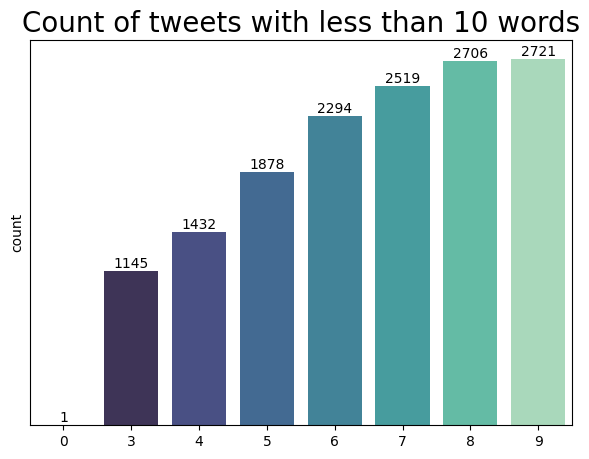

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=tweet_df[tweet_df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
# lets check long values
tweet_df.sort_values(by=['text_len'], ascending=False)

,text,label,clean_text,text_len
45213,is feminazi an actual word with a denot…\r\n@N...,cyberbullying,feminazi actual word denot job mean protecting...,377
40524,@NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...,cyberbullying,wutkinda rate mkr final december mkr haha true...,336
46760,I don't retreat.\r\nyessssssss http://t.co/Td9...,cyberbullying,retreat yes uh make grownup boruto look lit ba...,236
12296,You so black and white trying to live like a n...,cyberbullying,black white trying live like nigger pahahahaha...,174
13426,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",cyberbullying,fuck obama dumb as nigger bitch ltthis whore s...,154
...,...,...,...,...
9066,@NikeMan_JC10 your a clown ass nigga,cyberbullying,clown as nigga,3
45006,RT @Spacekatgal: Having an epic dinner with @Q...,cyberbullying,rt epic dinner,3
41042,@FanTaStIK_Zae2 big ass bully!,cyberbullying,big as bully,3
43547,@GlennF @ChrisWarcraft i loved him as FSJ. i h...,cyberbullying,loved fsj hated,3


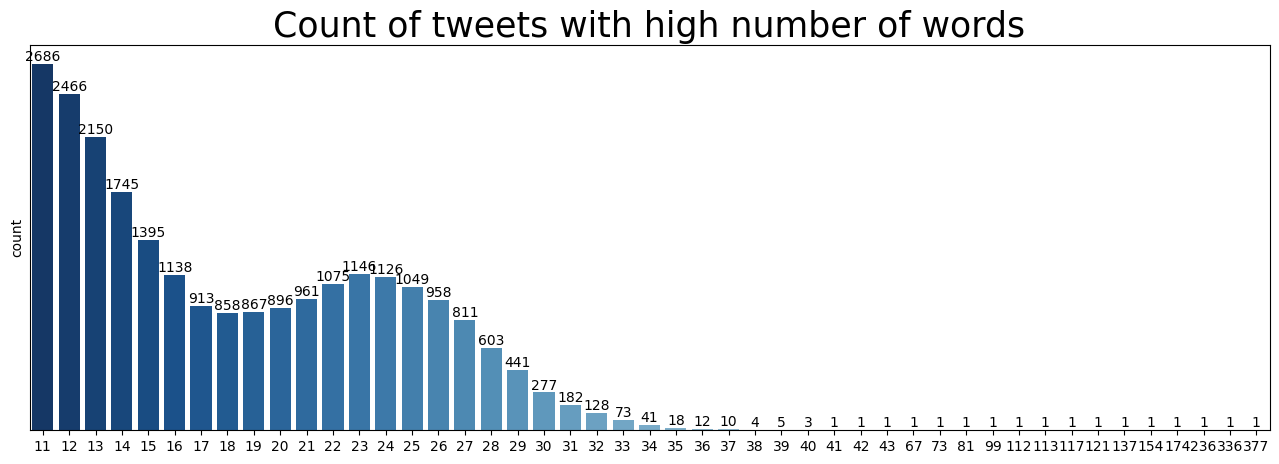

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=tweet_df[(tweet_df['text_len']<=1000) & (tweet_df['text_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()